In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
1,774 cases (7 day average) as of Sat 08 May, +20.0 since Fri 07 May
82 hospitalised (7 day average) as of Tue 11 May, -2.7 since Sun 09 May
8 died (7 day average) as of Sat 08 May, +0.0 since Fri 07 May


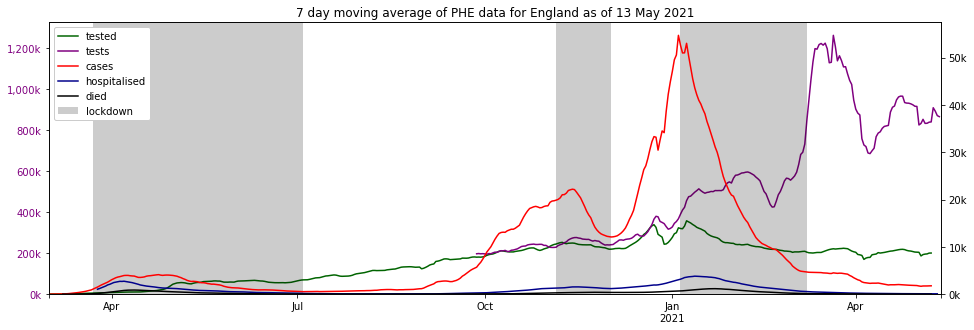

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

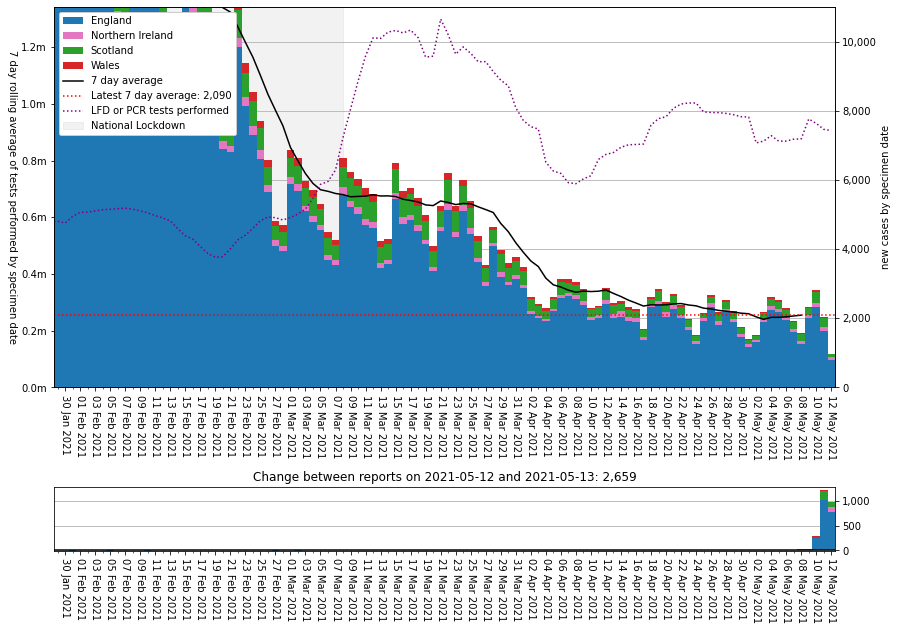

In [4]:
plot_areas(for_date, 'cases_nations', ylim=11_000, earliest='2021-01-29')

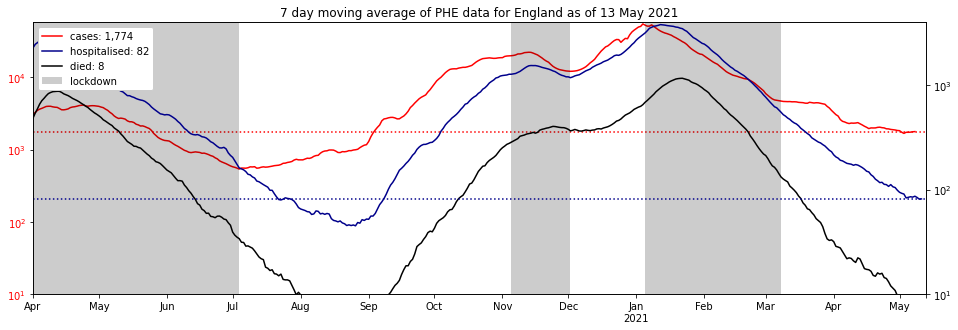

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

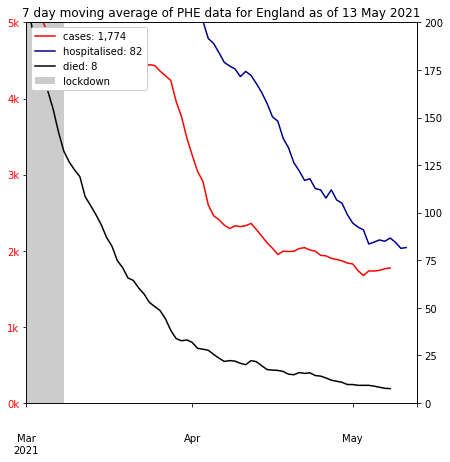

In [6]:
plot_summary(earliest_date='2021-03-01', show_latest=True, figsize=(7, 7),
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=5_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=200)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,12 May 21,"+15,935,683","+29,973,113","+15,935,683","+402,524","+146,934","+402,524"
Northern Ireland,12 May 21,"+526,191","+989,569","+526,191","+11,176","+3,561","+11,176"
Scotland,12 May 21,"+1,551,339","+2,968,169","+1,551,339","+24,450","+19,565","+24,450"
Wales,12 May 21,"+877,756","+1,975,820","+877,756","+14,287","+14,150","+14,287"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,15935683.0,29973113.0,14037430.0,56286961,28.311500,24.939044,46.749456
1,Northern Ireland,N92000002,526191.0,989569.0,463378.0,1893667,27.786881,24.469878,47.743241
2,Scotland,S92000003,1551339.0,2968169.0,1416830.0,5463300,28.395640,25.933593,45.670767
3,Wales,W92000004,877756.0,1975820.0,1098064.0,3152879,27.839825,34.827344,37.332831


'partial: 35,906,671 (53.8%), full: 18,890,969'

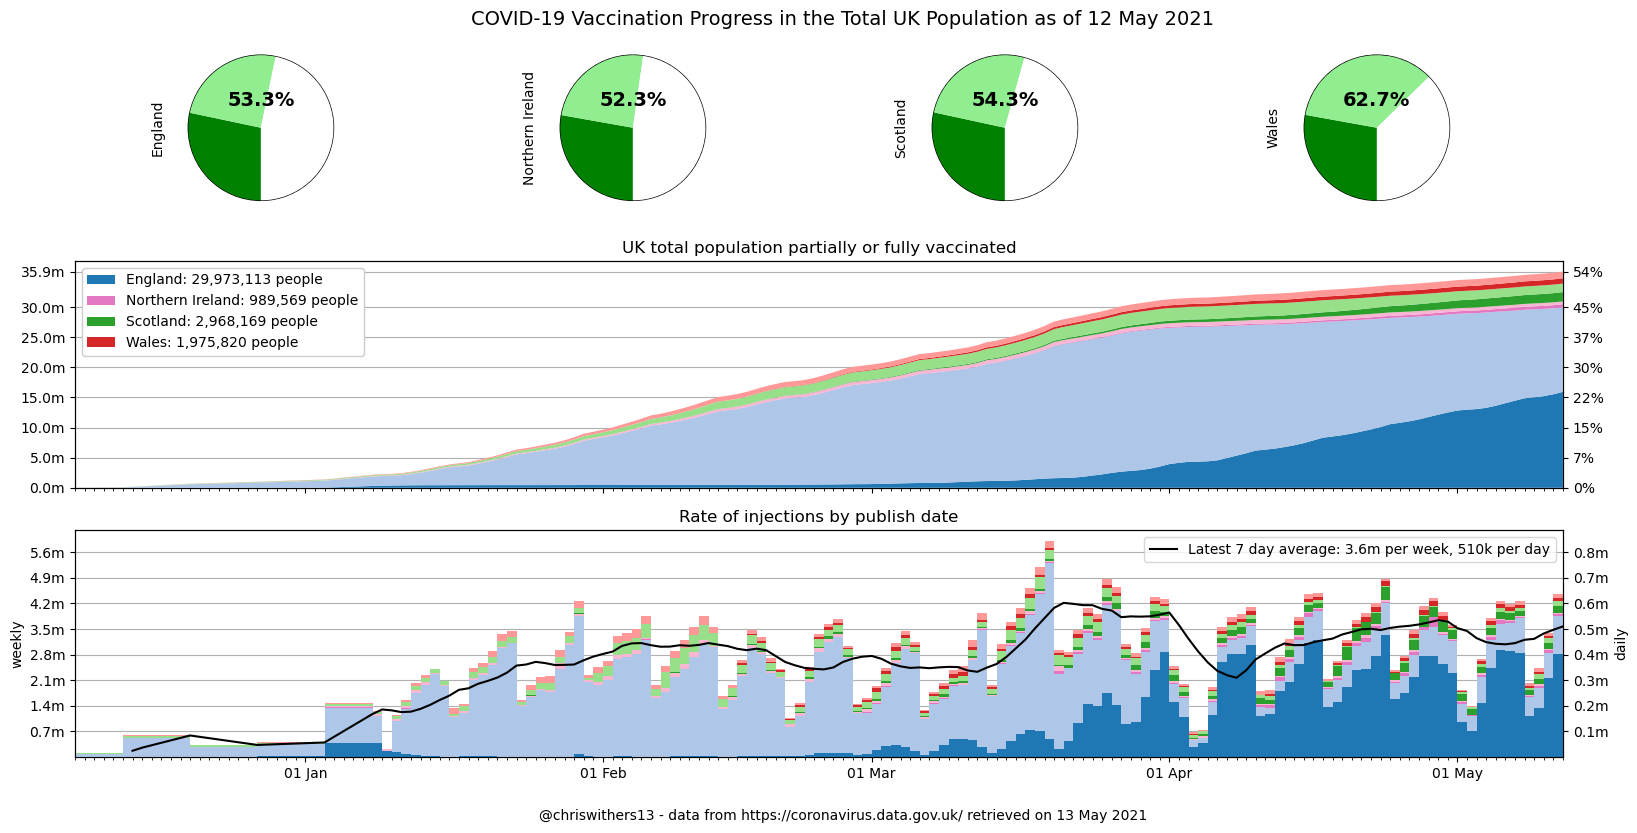

In [8]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

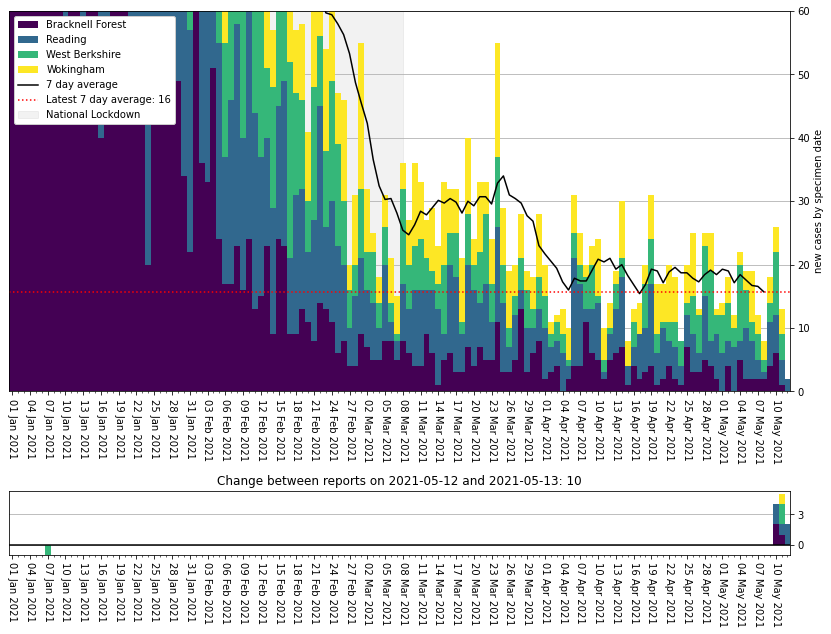

In [9]:
plot_areas(for_date, areas=my_areas, earliest='2021-01-01', ylim=60)

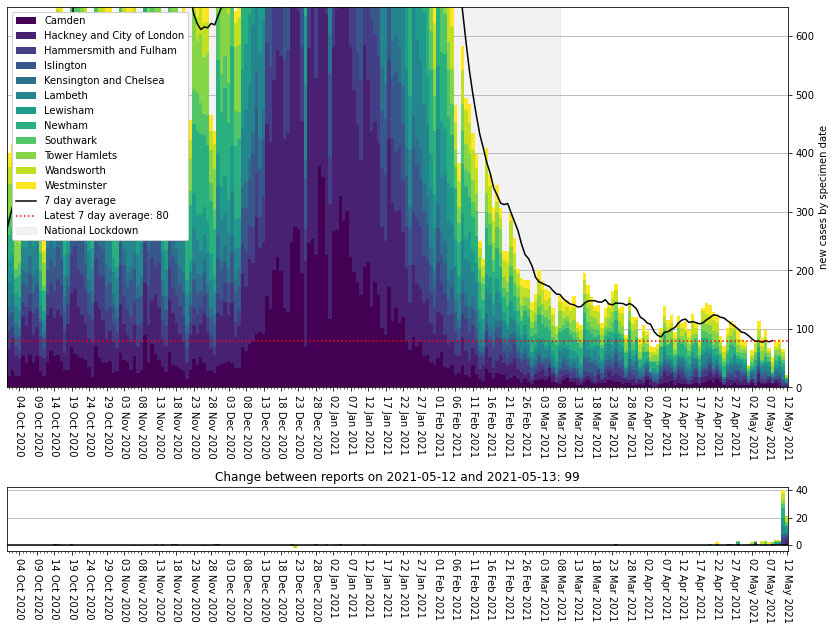

In [10]:
plot_areas(for_date, areas=london_areas, ylim=650)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000001,Bolton,234.741784,675.0,2021-05-12
E07000036,Erewash,109.212887,126.0,2021-05-12
E06000008,Blackburn with Darwen,104.879222,157.0,2021-05-12
E06000055,Bedford,100.985620,175.0,2021-05-12
N09000005,Derry City and Strabane,98.490257,149.0,2021-05-12
S12000049,Glasgow City,76.130907,482.0,2021-05-12
S12000020,Moray,57.399290,55.0,2021-05-12
E08000034,Kirklees,56.618318,249.0,2021-05-12
E07000133,Melton,52.725107,27.0,2021-05-12


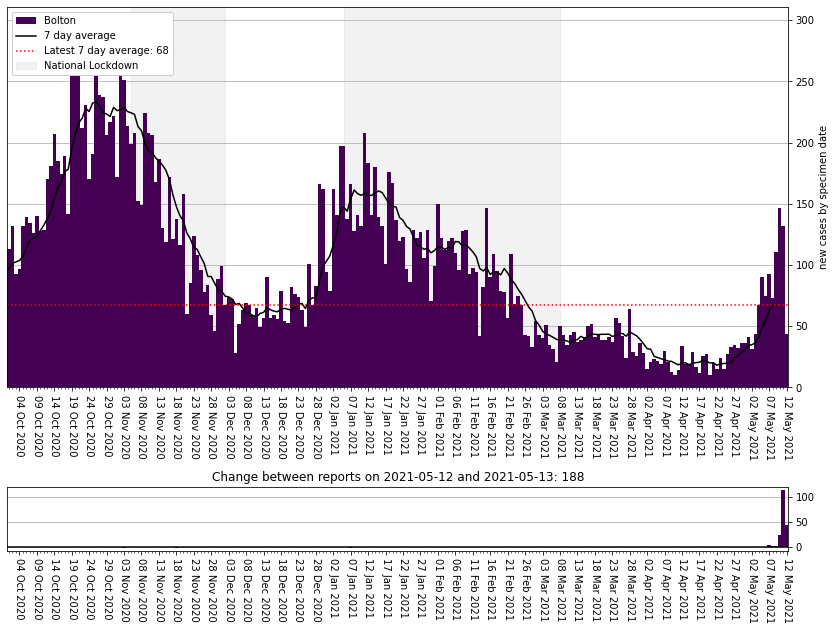

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000001,Bolton,234.741784,675.0,2021-05-12
S12000049,Glasgow City,76.130907,482.0,2021-05-12
E08000035,Leeds,44.254538,351.0,2021-05-12
E08000034,Kirklees,56.618318,249.0,2021-05-12
E08000019,Sheffield,42.574801,249.0,2021-05-12
E08000003,Manchester,41.421124,229.0,2021-05-12
E08000032,Bradford,37.237669,201.0,2021-05-12
E08000025,Birmingham,15.589202,178.0,2021-05-12
E06000055,Bedford,100.985620,175.0,2021-05-12


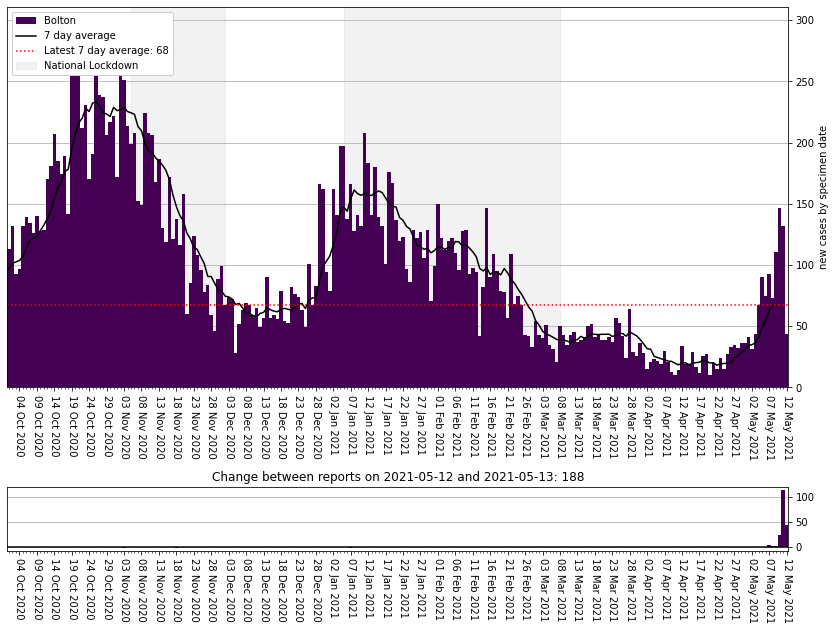

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 0.6
phe_max = 0.24

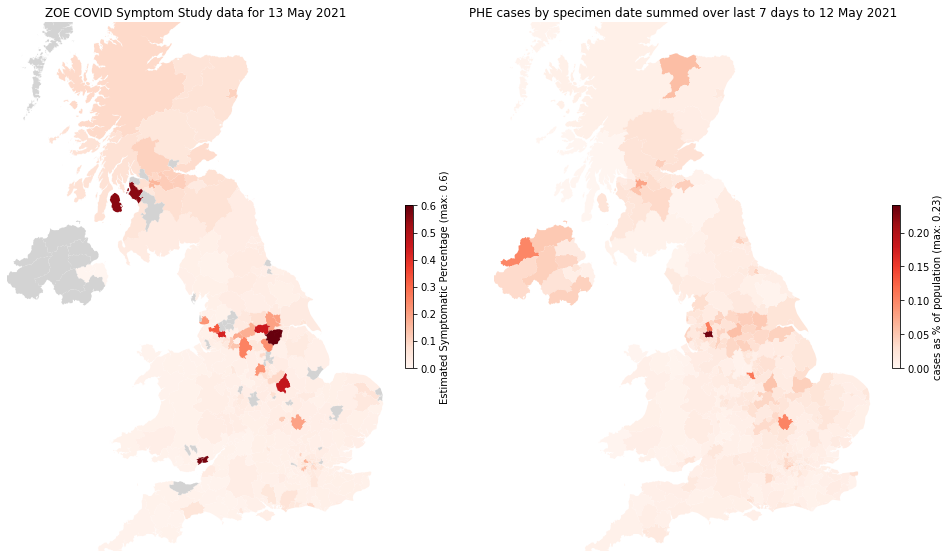

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...